Non-Linear Regression I
============

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
<p>Questions</p>
    <ul>
        <li> How can I analyze enzyme kinetics data in Python?
        <li> What is the process for non-linear least squares curve fitting in Python?
    </ul>
<p>Objectives:</p>
    <ul>
        <li> Create a pandas dataframe with enzyme kinetics data from a .csv file.
        <li> Add velocity calculations to the dataframe.
        <li> MPerform the non-linear regression calculations.
    </ul>
<p>
In this module, we will calculate initial rates from the raw data (ΔA405) in an enzyme kinetics experiment with alkaline phosphatase. In the process, we will import the raw data into a pandas dataframe, use some pandas tools to reorganize the data, produce a second pandas dataframe that contains the substrate concentrations and initial rates at each concentration. Finally, we will export this information to a csv file to use in the next module, where we will explore nonlinear curve fitting in Python.
</p>
</div>



### What is pandas and why do we use it?

Please note: this section about pandas is included for those who have not completed the Working with Pandas notebook already. Pandas is a python library that is designed to work with two dimensional data arrays. It is built on numpy, another python library that specializes in numerical analysis. Numpy also has the ability to create and analyze data arrays. If you are not familiar with arrays, here are some simple examples.

#### 1D arrays
A one dimensional array is simply a list of items, for example, a list of the elements: H, He, Li, Be, B, etc.

#### 2D arrays
A two dimensional array is an array which has rows and columns. It can have any number of columns and rows. A spreadsheet with rows and columns is analogous to a 2D array.

#### 3D arrays
A three-dimensional array would be a collection of two dimensional arrays. For example, this might be a collection of x, y, and z coordinates for a structure as a function of time.

The numpy library has functions that will manage n-dimensional arrays, while pandas only works on 2D arrays. You may need numpy for nD arrays at some point, but for this workshop, we will learn to use pandas as we learn how to perform linear and nonlinear regression of laboratory data based on data in 2D arrays.

The pandas library contains powerful tools for working with 2D data arrays, including the ability to identify the rows and columns of data by unique identifiers: things like “Substrate Concentration (mM)” and “initial velocity” rather than “row 1” or “column C”). Pandas also has many more functions that we will not explore in this workshop, but here are three excellent free online resources for learning more about pandas:

[Using pandas for data analysis from MolSSI](https://education.molssi.org/python-data-analysis/02-pandas/index.html)

[Charlie Weiss’s excellent online textbook](https://education.molssi.org/python-data-analysis/02-pandas/index.html)

Scientific Computing for Chemists, which you can find on his GitHub site, [SciCompforChemists](https://weisscharlesj.github.io/SciCompforChemists/intro.html)

[Corey Schafer’s Pandas Tutorials on YouTube](https://www.youtube.com/watch?v=ZyhVh-qRZPA&amp;list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS)




### Importing the Data
We start by importing data from a csv file as we did earlier with the data for linear regression. These data represent the rate of p-nitrophenol appearance for a series of p-nitrophenol phosphate concentrations in the presence of alkaline phosphatase. We will import the libraries we need, import the data and set up a pandas dataframe.

In [5]:
# import the libraries we need
import os # to create a filehandle for the .csv file
import pandas as pd # for importing the .csv file and creating a dataframe
from scipy import stats # for performing non-linear regression

In [6]:
os.getcwd()

'/workspaces/iqb-2024'

In [7]:
cd iqb-101/

/workspaces/iqb-2024/iqb-101


In [8]:
# Create the filehandle for the csv file that contains your data
datafile = os.path.join('data', 'AP_kin.csv') # filehandle created
print(datafile)  # filehandle confirmed

data/AP_kin.csv


### Creating the pandas dataframe
The filehandle, datafile, points to a csv file that contains the raw kinetics data. As we saw in the Working with Pandas module, the pandas library has a tool for creating a dataframe from an existing csv file. Notice that the variable for the dataframe is called AP_kin_df. The _df at the end of the variable name is a reminder that this is a pandas dataframe.

In [16]:
# Creating the pandas dataframe using read_csv

AP_kin_df = pd.read_csv(datafile)

AP_kin_df.head()  # looking at the first five rows of the dataframe 

,Time (min),20.0,10.0,7.0,4.0,2.0,1.0,0.7,0.4,0.2,0.1,0.05
0,0.25,0.127118,0.121434,0.123059,0.103351,0.088046,0.062613,0.051681,0.034661,0.019578,0.020353,0.005635
1,0.50,0.269802,0.257587,0.239086,0.210920,0.177801,0.122747,0.104366,0.068643,0.040318,0.040318,0.011162
2,0.75,0.373572,0.364301,0.369177,0.313216,0.246186,0.193419,0.147517,0.099906,0.059896,0.056988,0.016580
3,1.00,0.518850,0.500455,0.468796,0.400747,0.352183,0.257892,0.194682,0.134567,0.073658,0.075985,0.022757
4,1.25,0.616135,0.613302,0.556695,0.500934,0.444503,0.309966,0.258405,0.173306,0.099827,0.100796,0.027092


When you look at this dataframe, notice that the index (the item at the far left of each row) is an integer. In this case, we want to use the ‘Time (min)’ values that are found in the first series as the index. There is a simple fix - the set_index function.

In [17]:
# Set index to values in the Time column
AP_kin_df.set_index('Time (min)', inplace=True)
AP_kin_df.head() # to make sure we got what we expected

,20.0,10.0,7.0,4.0,2.0,1.0,0.7,0.4,0.2,0.1,0.05
Time (min),,,,,,,,,,,
0.25,0.127118,0.121434,0.123059,0.103351,0.088046,0.062613,0.051681,0.034661,0.019578,0.020353,0.005635
0.50,0.269802,0.257587,0.239086,0.210920,0.177801,0.122747,0.104366,0.068643,0.040318,0.040318,0.011162
0.75,0.373572,0.364301,0.369177,0.313216,0.246186,0.193419,0.147517,0.099906,0.059896,0.056988,0.016580
1.00,0.518850,0.500455,0.468796,0.400747,0.352183,0.257892,0.194682,0.134567,0.073658,0.075985,0.022757
1.25,0.616135,0.613302,0.556695,0.500934,0.444503,0.309966,0.258405,0.173306,0.099827,0.100796,0.027092


By making the time values the index for each row, we can easily omit them from our initial rate calculations. We use the 'inplace=True' option to make the change to the dataframe permanent.

### Datatype

Before we calculate the slopes to get initial velocities, we need to check for the datatypes on the numbers. We must ensure that the numbers are floats, rather than strings, so we can do calculations on them.

In [18]:
 # checking to see if the numbers are strings or floats
AP_kin_df.index.dtype

dtype('float64')

### Calculating the initial velocity
The index for each row is the time, which will be the x values to get the slope of each line. The values in each column are the absorbance values at each time point, so those will be our y values. Now we need to follow these steps to calculate the initial velocity at each substrate concentration.

1. Inspect the data.

2. Create a second dataframe with the substrate concentration as the first series.

3. Calculate the slopes from the first dataframe and add those as a column to the second dataframe.

4. Calculate the initial velocity by dividing the slope by the extinction coefficient for p-nitrophenol under these buffer conditions, 15.0 mM-1cm-1.

5. Export the second dataframe to a csv file that we will use in the next module.

#### Inspect the data
In an earlier module, we used pyplot from matplotlib to create a well-annotated plot of our linear regression data. We could do that here, but we only want to inspect the data to make sure we are on the right track. To do that we can use the plot command from pandas, which builds the plot using tools from matplotlib. The syntax is



In [ ]:
dataframe.plot()

In our case, the only argument we will pass is “marker = ‘o’ so that the individual data points will appear.

<Axes: xlabel='Time (min)'>

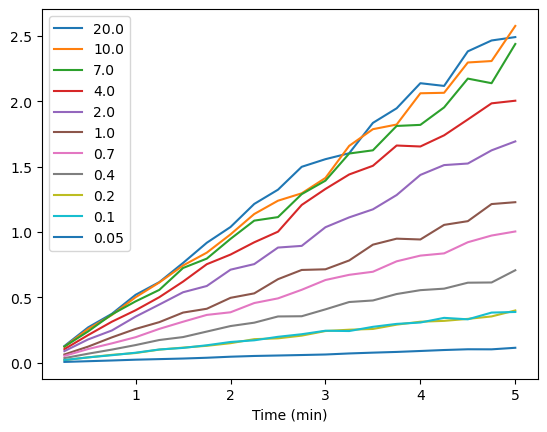

In [22]:
# 1. Inspect the data using the plot command available with the datafame
# We use the plot function built into pandas

AP_kin_df.plot()

<Axes: xlabel='Time (min)'>

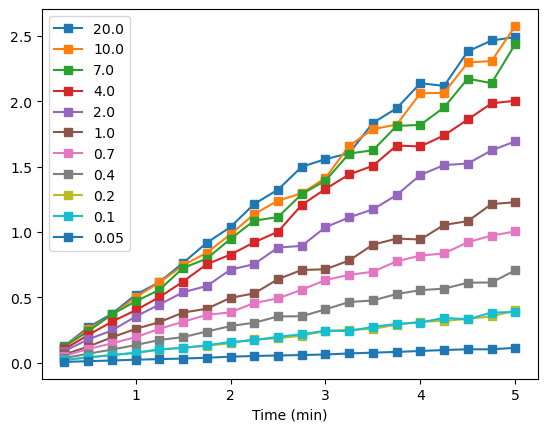

In [37]:
AP_kin_df.plot(marker = 's') 

# marker styles e.g.,  o - circles, d - diamonds, s - squares

In [47]:
# 2. Create a second dataframe with the substrate concentration as the first series.
# Note the syntax for this pandas function - the D and F are capitalized.
MM_df = pd.DataFrame()
MM_df['pNPP (mM)'] = AP_kin_df.columns # .columns = all columns headers
MM_df

,pNPP (mM)
0,20.0
1,10.0
2,7.0
3,4.0
4,2.0
5,1.0
6,0.7
7,0.4
8,0.2
9,0.1


#### Calculate the slope
There is some scatter in the data, but generally, the slopes of the curves increase with increasing substrate concentration. Now we need to calculate the slopes for each of the lines in the plot above. To do so, we can use the linregress function from scipy.stats that we used for the least squares linear regression analysis of the protein assay data from an earlier module. We will use the index from our data frame, Time (min), AP_kin_df. The y values will be taken from each of the series from the same dataframe.

Remember that linregress provides five outputs: slope, intercept, r-value, p-value and standard error. We need only the slope, so we will use this format

In [ ]:
slope, _, _, _, _ = stats.linregress(xdata, ydata)

where _ is just a placeholder that we will ignore.

To get the slopes for each series we will use a for loop. First, we’ll create an empty list to contain the slopes that are generated as the for loop cycles through the series in the AP_kin_df dataframe.


In [48]:
# Create an empty list to hold the slopes 
slopes = []

# 3. Calculate the slopes from each column in the AP_kin_df dataframe
for column in AP_kin_df.columns : 
    slope, _, _, _, _ = stats.linregress(AP_kin_df.index, AP_kin_df[column])
    slopes.append(slope)

slopes

[0.5140907641142857,
 0.5031401632390977,
 0.4704346427639098,
 0.4170212341052632,
 0.3424447812571429,
 0.2462595355909775,
 0.20284295232781954,
 0.1364430576421053,
 0.07644213958496242,
 0.07806979615939849,
 0.022319351245112782]

In [49]:
# Populate the new dataframe withn the slopes
MM_df['slope'] = slopes
MM_df

,pNPP (mM),slope
0,20.0,0.514091
1,10.0,0.503140
2,7.0,0.470435
3,4.0,0.417021
4,2.0,0.342445
5,1.0,0.246260
6,0.7,0.202843
7,0.4,0.136443
8,0.2,0.076442
9,0.1,0.078070


#### Calculate the initial velocity
The initial velocity can be calculated by dividing the slope by the micromolar extinction coefficient under the experimental conditions, 0.015 &mu;M<sup>-1</sup> cm<sup>-1</sup>. It is possible to complete the calculation and add it to the dataframe with a single line of code.

**Check your understanding** 

Check that your file was read in correctly by determining how many lines are in the file.

